# Machine Learning pipeline with 10 Machine Learning Algorithms
<img src="http://ijrp.org/content/subject/foundationscomputerscience_378x212_0.jpg"><br><br>
### 1.  Linear Regression
### 2. Bagging Regressor
### 3.  K Nearest Neighbours Classifier
### 4.  Decision Tree Regressor
### 5.  Ridge
### 6.  Extra Tree Regressor
### 7.  Random Forest Regressor
### 8.  Gradient Boosting Regressor
### 9.   AdaBoost Regressor
### 10. Lasso

In [1]:
#Dataset

#### 1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.




## Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import sys
import warnings

warnings.filterwarnings("ignore")

## Use Pandas to import the data

In [5]:
dataset = pd.read_csv("housing.data", delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset.columns = col_name
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Data Cleaning

In [6]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Data Exploratory Analysis

In [7]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
print(dataset.dtypes)
# head
print(dataset.describe())
# correlation
print(dataset.corr(method='pearson'))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871

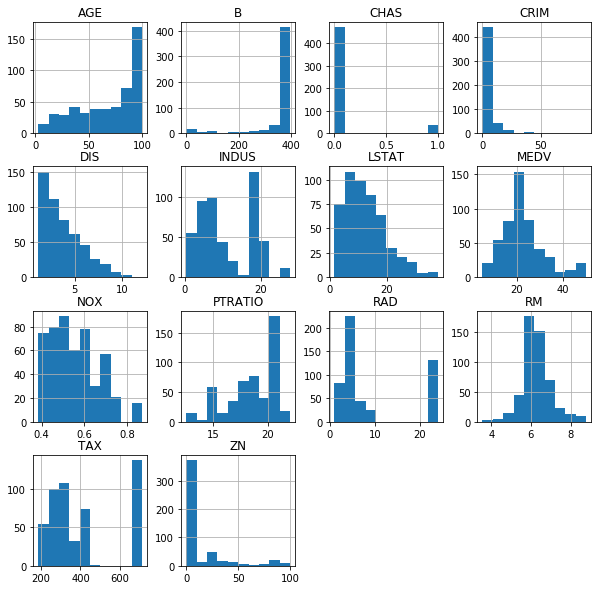

In [8]:
# histograms
dataset.hist(figsize=(10, 10))
plt.show()

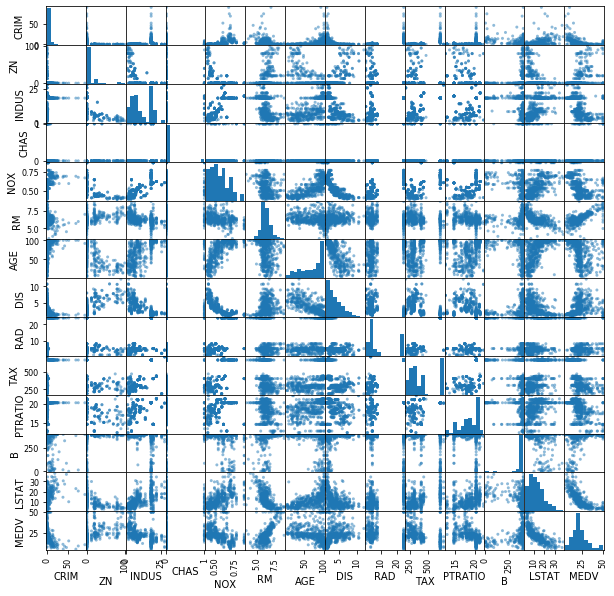

In [11]:
from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(dataset,figsize=(10, 10))
plt.show()

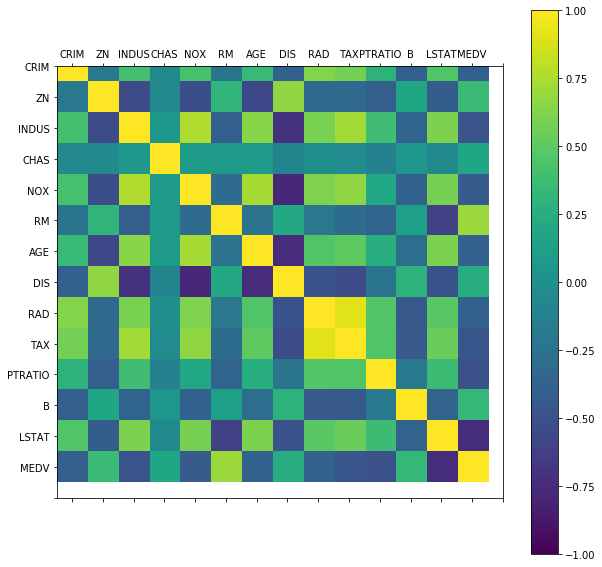

In [12]:
# correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

## Prepare Data

In [13]:
new_dataset=dataset[['CRIM','INDUS','CHAS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]
new_dataset

CRIM  INDUS  CHAS    NOX     RM    TAX  PTRATIO  LSTAT  MEDV
0    0.00632   2.31     0  0.538  6.575  296.0     15.3   4.98  24.0
1    0.02731   7.07     0  0.469  6.421  242.0     17.8   9.14  21.6
2    0.02729   7.07     0  0.469  7.185  242.0     17.8   4.03  34.7
3    0.03237   2.18     0  0.458  6.998  222.0     18.7   2.94  33.4
4    0.06905   2.18     0  0.458  7.147  222.0     18.7   5.33  36.2
..       ...    ...   ...    ...    ...    ...      ...    ...   ...
501  0.06263  11.93     0  0.573  6.593  273.0     21.0   9.67  22.4
502  0.04527  11.93     0  0.573  6.120  273.0     21.0   9.08  20.6
503  0.06076  11.93     0  0.573  6.976  273.0     21.0   5.64  23.9
504  0.10959  11.93     0  0.573  6.794  273.0     21.0   6.48  22.0
505  0.04741  11.93     0  0.573  6.030  273.0     21.0   7.88  11.9

[506 rows x 9 columns]

In [14]:
X= new_dataset.copy()
X.drop('MEDV', inplace=True, axis=1)
X

CRIM  INDUS  CHAS    NOX     RM    TAX  PTRATIO  LSTAT
0    0.00632   2.31     0  0.538  6.575  296.0     15.3   4.98
1    0.02731   7.07     0  0.469  6.421  242.0     17.8   9.14
2    0.02729   7.07     0  0.469  7.185  242.0     17.8   4.03
3    0.03237   2.18     0  0.458  6.998  222.0     18.7   2.94
4    0.06905   2.18     0  0.458  7.147  222.0     18.7   5.33
..       ...    ...   ...    ...    ...    ...      ...    ...
501  0.06263  11.93     0  0.573  6.593  273.0     21.0   9.67
502  0.04527  11.93     0  0.573  6.120  273.0     21.0   9.08
503  0.06076  11.93     0  0.573  6.976  273.0     21.0   5.64
504  0.10959  11.93     0  0.573  6.794  273.0     21.0   6.48
505  0.04741  11.93     0  0.573  6.030  273.0     21.0   7.88

[506 rows x 8 columns]

In [15]:
y= new_dataset['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Train_test_split dataset

In [39]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [40]:
scoring = 'r2'

## Define the 10 Machine learning Algorithms for the Pipeline

In [41]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('Rigde', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('BaggingRegressor', BaggingRegressor()))
models.append(('ADABOOST', AdaBoostRegressor()))
models.append(('GBOOST', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XTREE', ExtraTreesRegressor()))

In [42]:
results = []
features = []

In [43]:
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
    results.append(cv_results)
    features.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.715742 (0.040709)
DTR: 0.732473 (0.090221)
SVM: 0.189985 (0.113751)
Rigde: 0.716197 (0.040940)
Lasso: 0.675000 (0.063330)
BaggingRegressor: 0.833157 (0.050962)
ADABOOST: 0.812438 (0.058419)
GBOOST: 0.870994 (0.051300)
RF: 0.836727 (0.057342)
XTREE: 0.873563 (0.044496)


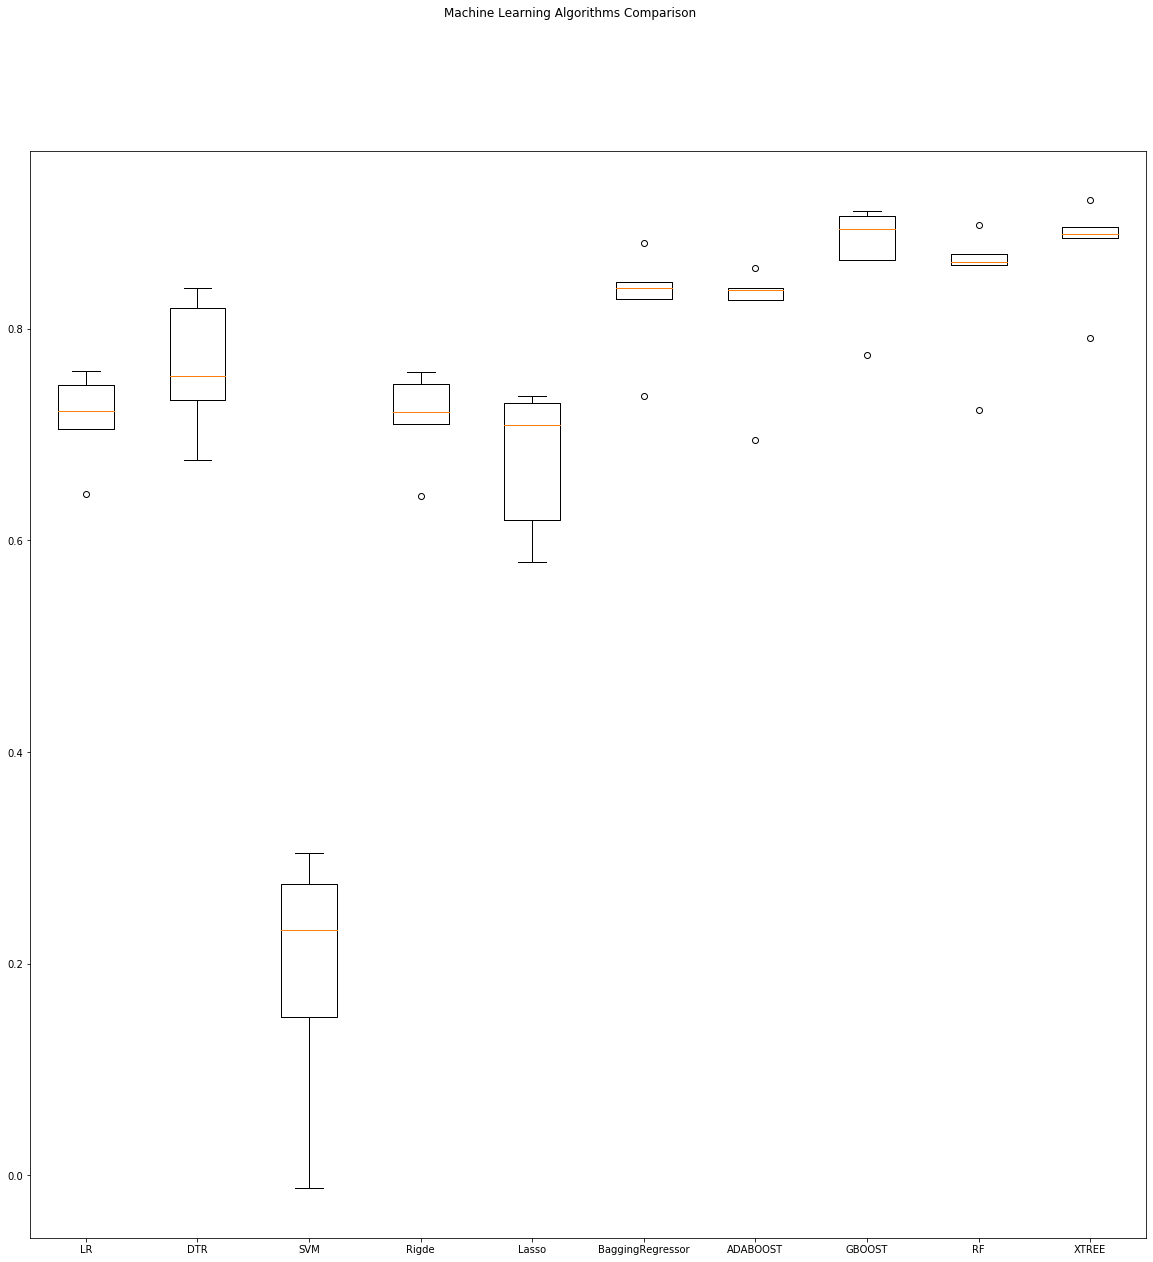

In [21]:
# Compare Algorithms
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Machine Learning Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(features)
plt.show()

# Ensemble Machine Learning

In [22]:
from sklearn.ensemble import VotingRegressor
from sklearn import model_selection

## Create an Ensemble of Machine learning models 

In [24]:
estimators = []

## Add each model required to the Ensemble

In [25]:
model1 = LinearRegression()
estimators.append(('LinearRegression', model1))

In [26]:
model2 = DecisionTreeRegressor()
estimators.append(('DTR', model2))

In [27]:
model3 = SVR()
estimators.append(('SVM', model3))

In [28]:
model4 = BaggingRegressor()
estimators.append(('BaggingRegressor', model4))

In [29]:
model5 = Ridge()
estimators.append(('Ridge', model5))

In [30]:
model6 = Lasso()
estimators.append(('Lasso', model6))

In [31]:
model7 = ExtraTreesRegressor()
estimators.append(('XTREE', model7))

In [32]:
model8 = AdaBoostRegressor()
estimators.append(('ADABOOST', model8))

In [33]:
model9 = GradientBoostingRegressor()
estimators.append(('GBOOST', model9))

In [34]:
model10 = RandomForestRegressor()
estimators.append(('RF', model10))

## Create the Ensemble model

In [46]:
ensemble = VotingRegressor(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=5)
print(results.mean())

0.8290506223440485
